In [1]:
#pip install pandas openpyxl


In [2]:
## Import Needed Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
## Import Data

file_path = 'NCES_Tab318_45_race_sex_degreelevel.xlsx'
sheet_name = 'Digest 2023 Table 318.45'

# Read Excel
df = pd.read_excel(file_path, sheet_name= sheet_name)

# Creating Multiple Dataframes
## Years vs Total Degrees Conferred

In [4]:
## Make Dataframe

data_a = df.iloc[6:16, 0:2]
df_years_deg = pd.DataFrame(data_a)
df_years_deg.rename(columns={
    'Table 318.45. Number and percentage distribution of science, technology, engineering, and mathematics (STEM) degrees/certificates conferred by postsecondary institutions, by race/ethnicity, level of \n              degree/certificate, and sex of student: Academic years 2012-13 through 2021-22': 'Year',
    'Unnamed: 1': 'Total_Degrees'
}, inplace=True)
df_years_deg.shape
print(df_years_deg.head(10))
#df_years_deg.columns
#print(data_a)


       Year Total_Degrees
6   2012-13        574000
7   2013-14        604167
8   2014-15        635800
9   2015-16        668091
10  2016-17        704861
11  2017-18        733459
12  2018-19        756960
13  2019-20        774598
14  2020-21        790886
15  2021-22        789264


### Time Series Plot

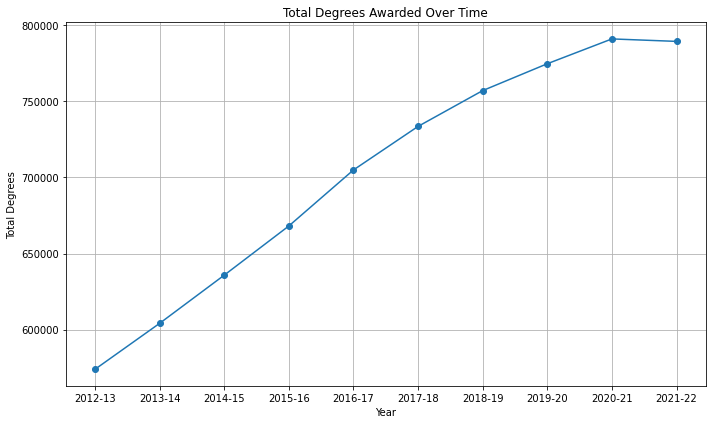

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df_years_deg['Year'], df_years_deg['Total_Degrees'], marker='o', linestyle='-')
plt.title('Total Degrees Awarded Over Time')
plt.xlabel('Year')
plt.ylabel('Total Degrees')
plt.grid(True)
plt.tight_layout()
plt.show()


### Year Over Year Growth Rate

Year-over-year (YoY) growth shows the percentage change in a particular metric (in this case, total degrees awarded) compared to the same period in the previous year.
Positive means increase and negative means a decrease.

% = ((current - previous year)/previous) * 100

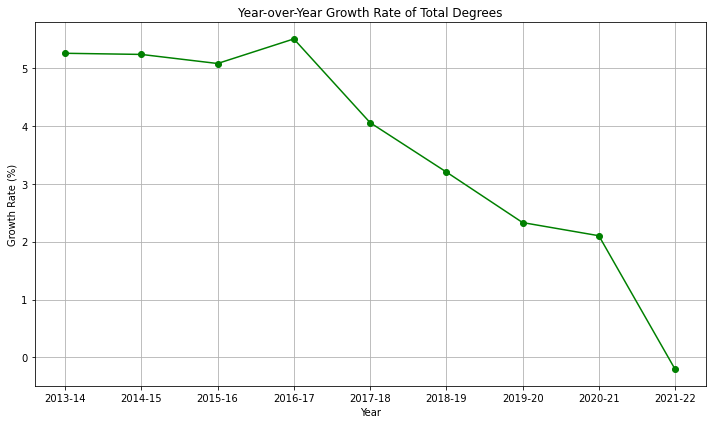

In [6]:
df_years_deg['Growth_Rate'] = df_years_deg['Total_Degrees'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(df_years_deg['Year'], df_years_deg['Growth_Rate'], marker='o', linestyle='-', color='green')
plt.title('Year-over-Year Growth Rate of Total Degrees')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



## Year vs Total per Degree Level

In [7]:
data_below_b = df.iloc[40:50, 0:2]

#print(data_below_b)

df_below_b = pd.DataFrame(data_below_b)
df_below_b.rename(columns={
    'Table 318.45. Number and percentage distribution of science, technology, engineering, and mathematics (STEM) degrees/certificates conferred by postsecondary institutions, by race/ethnicity, level of \n              degree/certificate, and sex of student: Academic years 2012-13 through 2021-22': 'Year',
    'Unnamed: 1': 'below_baccalaureate'
}, inplace=True)

print(df_below_b.shape)
df_below_b.head(10)

#df_below_b.columns
#print(df_below_b)



(10, 2)


,Year,below_baccalaureate
40,2012-13,60908
41,2013-14,70041
42,2014-15,71253
43,2015-16,76048
44,2016-17,77832
45,2017-18,83243
46,2018-19,89119
47,2019-20,87625
48,2020-21,90704
49,2021-22,96637


In [8]:
data_associate = df.iloc[74:84, 0:2]

#print(data_associate)

df_associate = pd.DataFrame(data_associate)
df_associate.rename(columns={
    'Table 318.45. Number and percentage distribution of science, technology, engineering, and mathematics (STEM) degrees/certificates conferred by postsecondary institutions, by race/ethnicity, level of \n              degree/certificate, and sex of student: Academic years 2012-13 through 2021-22': 'Year',
    'Unnamed: 1': 'associate'
}, inplace=True)

print(df_associate.shape)
df_associate.head(10)

#df_associate.columns
#print(df_associate)

(10, 2)


,Year,associate
74,2012-13,88800
75,2013-14,87366
76,2014-15,88401
77,2015-16,79869
78,2016-17,82334
79,2017-18,85271
80,2018-19,86833
81,2019-20,85231
82,2020-21,87422
83,2021-22,84856


In [11]:
## Similar to below_b & associates, extract data for bachelors, masters, and doctors


# Bachelors
data_bachelors = df.iloc[108:118, 0:2]
df_bachelors = pd.DataFrame(data_bachelors)
df_bachelors.rename(columns={
    'Table 318.45. Number and percentage distribution of science, technology, engineering, and mathematics (STEM) degrees/certificates conferred by postsecondary institutions, by race/ethnicity, level of \n              degree/certificate, and sex of student: Academic years 2012-13 through 2021-22': 'Year',
    'Unnamed: 1': 'bachelors'
}, inplace=True)


# Masters
data_masters = df.iloc[142:152, 0:2]
df_masters = pd.DataFrame(data_masters)
df_masters.rename(columns={
    'Table 318.45. Number and percentage distribution of science, technology, engineering, and mathematics (STEM) degrees/certificates conferred by postsecondary institutions, by race/ethnicity, level of \n              degree/certificate, and sex of student: Academic years 2012-13 through 2021-22': 'Year',
    'Unnamed: 1': 'masters'
}, inplace=True)

# Doctors
data_doctors = df.iloc[176:186, 0:2]
df_doctors = pd.DataFrame(data_doctors)
df_doctors.rename(columns={
    'Table 318.45. Number and percentage distribution of science, technology, engineering, and mathematics (STEM) degrees/certificates conferred by postsecondary institutions, by race/ethnicity, level of \n              degree/certificate, and sex of student: Academic years 2012-13 through 2021-22': 'Year',
    'Unnamed: 1': 'doctors'
}, inplace=True)

In [16]:
## Combine all dfs together
df_combined = pd.merge(df_below_b, df_associate, on='Year', how='outer')
df_combined = pd.merge(df_combined, df_bachelors, on='Year', how='outer')
df_combined = pd.merge(df_combined, df_masters, on='Year', how='outer')
df_combined = pd.merge(df_combined, df_doctors, on='Year', how='outer')

numeric_columns = ['below_baccalaureate', 'associate', 'bachelors', 'masters', 'doctors']
df_combined[numeric_columns] = df_combined[numeric_columns].apply(pd.to_numeric)
#print(df_combined.dtypes)
df_combined.head(10)

,Year,below_baccalaureate,associate,bachelors,masters,doctors
0,2012-13,60908,88800,302340,95375,26577
1,2013-14,70041,87366,318612,100078,28070
2,2014-15,71253,88401,335849,112260,28037
3,2015-16,76048,79869,354794,129142,28238
4,2016-17,77832,82334,376869,139282,28544
5,2017-18,83243,85271,395235,140255,29455
6,2018-19,89119,86833,412962,138192,29854
7,2019-20,87625,85231,429352,142799,29591
8,2020-21,90704,87422,437344,146594,28822
9,2021-22,96637,84856,435506,139944,32321


### Stacked Area Chart

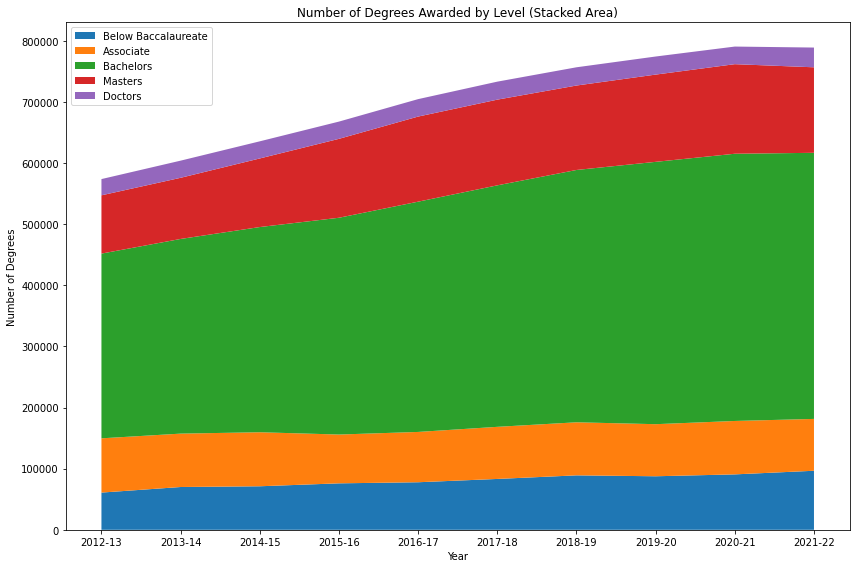

In [17]:
# Plotting stacked area chart
plt.figure(figsize=(12, 8))

plt.stackplot(df_combined['Year'], df_combined['below_baccalaureate'], df_combined['associate'], df_combined['bachelors'], df_combined['masters'], df_combined['doctors'],
              labels=['Below Baccalaureate', 'Associate', 'Bachelors', 'Masters', 'Doctors'],
              colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

plt.title('Number of Degrees Awarded by Level (Stacked Area)')
plt.xlabel('Year')
plt.ylabel('Number of Degrees')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Bar Chart

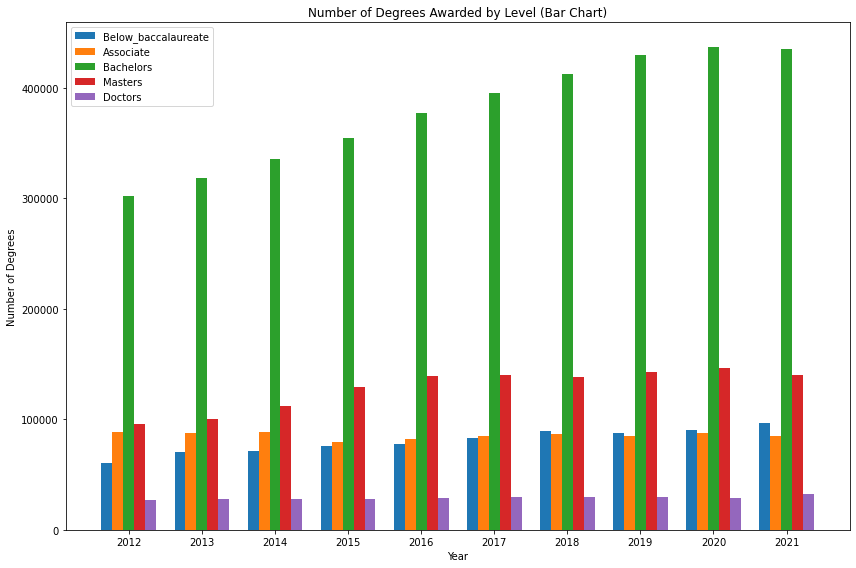

In [19]:
df_combined['Year'] = pd.to_datetime(df_combined['Year'].str.split('-').str[0], format='%Y')  # Convert Year to datetime format

# Plotting bar chart for each degree level by year
plt.figure(figsize=(12, 8))

bar_width = 0.15
index = df_combined.index
labels = df_combined['Year'].dt.year

for i, column in enumerate(['below_baccalaureate', 'associate', 'bachelors', 'masters', 'doctors']):
    plt.bar(index + i * bar_width, df_combined[column], bar_width, label=column.capitalize())

plt.xlabel('Year')
plt.ylabel('Number of Degrees')
plt.title('Number of Degrees Awarded by Level (Bar Chart)')
plt.xticks(index + bar_width * 2, labels)
plt.legend()
plt.tight_layout()
plt.show()
